# Book Recommendation System USing Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Project Objective
The aim of this project is to develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Problem Statement
A book recommendation system enhances user experience by suggesting titles tailored to individual preferences, making it easier for users to discover books they are likely to enjoy. For online bookstores, this can lead to increased engagement, higher conversion rates, and greater customer satisfaction. By analyzing user behavior and leveraging collaborative filtering, the system helps match readers with books they may not have found otherwise, thereby boosting sales and encouraging repeat visits.

---

## Data Collection

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

<ipython-input-1-b21d314e05db>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(


100%|██████████| 3.56M/3.56M [00:00<00:00, 124MB/s]

Extracting zip of ratings.csv...



<ipython-input-1-b21d314e05db>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


100%|██████████| 0.98M/0.98M [00:00<00:00, 84.4MB/s]

Extracting zip of books.csv...


In [2]:
# Display the first 5 rows of rating dataset
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
# Check the info about the data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [4]:
# Check unique book_id in ratings datatset
unique_book_ids = ratings_df['book_id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [5]:
# Check the summary statistics of the dataset
ratings_df.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [6]:
# Display the first 5 rows of books dataset
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [7]:
# Check the summary statistics of the dataset
books_df.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [8]:
# Check unique id in books dataset
unique_book_ids = books_df['id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [9]:
# Check the info about the data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

## Exploratory Data Analysis (EDA)

### 📊 Ratings Dataset EDA (ratings_df)

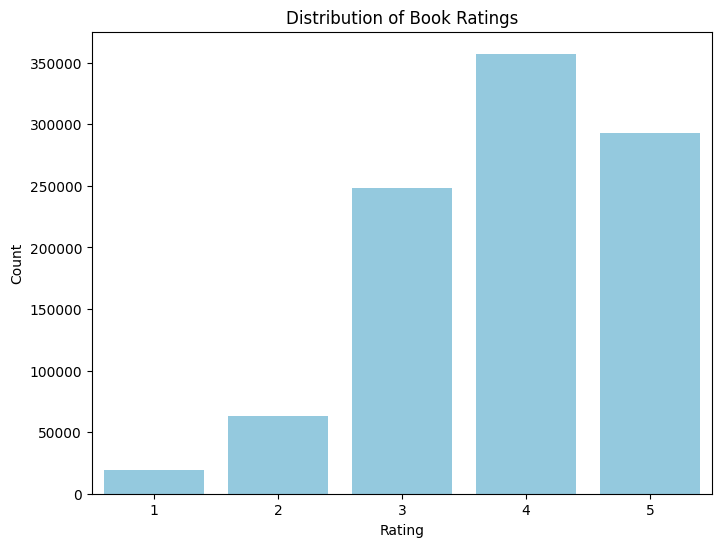

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**a. Number of Ratings per Book**
- Find out how many ratings each book has received.

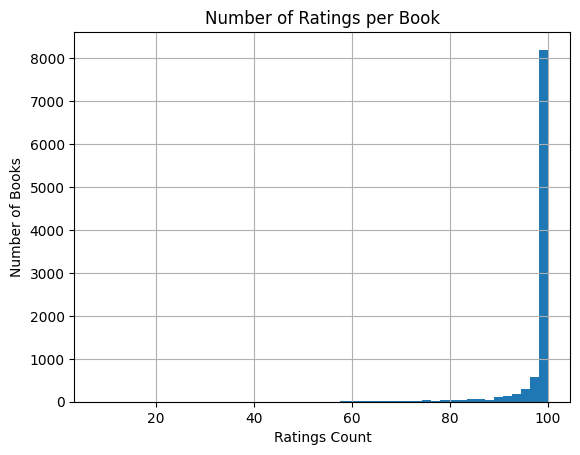

In [11]:
ratings_per_book = ratings_df['book_id'].value_counts()
ratings_per_book.hist(bins=50)
plt.title("Number of Ratings per Book")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Books")
plt.show()


**b. Average Rating per Book**
- Identify the books with the highest and lowest average ratings.

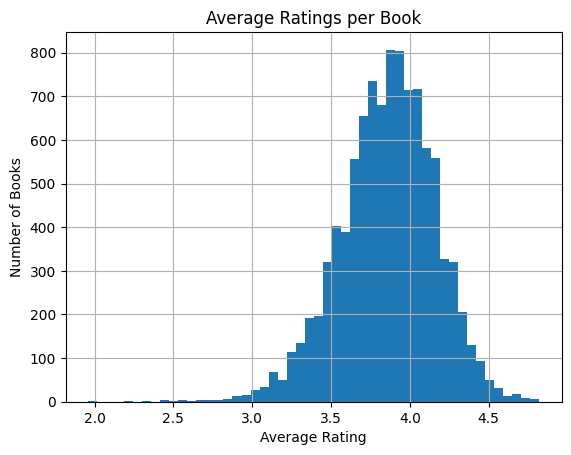

In [12]:
avg_ratings = ratings_df.groupby('book_id')['rating'].mean()
avg_ratings.hist(bins=50)
plt.title("Average Ratings per Book")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.show()


**c. Ratings per User**
- Analyze how active users are by calculating how many ratings each user has given.

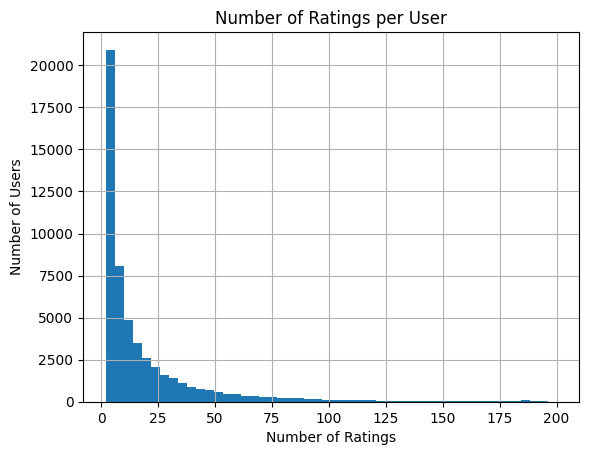

In [13]:
ratings_per_user = ratings_df['user_id'].value_counts()
ratings_per_user.hist(bins=50)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


**d. Top Users and Books**
- Identify the top 10 most active users and the most rated books.

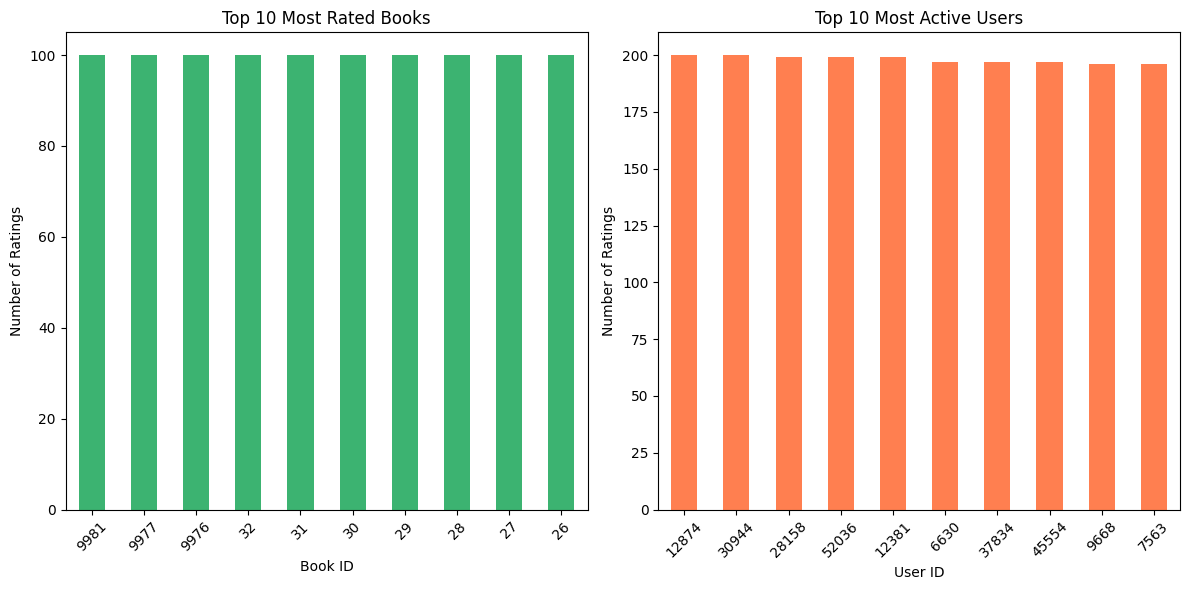

In [14]:
# Get top 10 most rated books and most active users
top_books = ratings_df['book_id'].value_counts().head(10)
top_users = ratings_df['user_id'].value_counts().head(10)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the top 10 most rated books
top_books.plot(kind='bar', color='mediumseagreen', ax=axes[0])
axes[0].set_title('Top 10 Most Rated Books')
axes[0].set_xlabel('Book ID')
axes[0].set_ylabel('Number of Ratings')
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 most active users
top_users.plot(kind='bar', color='coral', ax=axes[1])
axes[1].set_title('Top 10 Most Active Users')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Number of Ratings')
axes[1].tick_params(axis='x', rotation=45)

# Improve layout and display plot
plt.tight_layout()
plt.show()


## 📚 Books Dataset EDA (books_df)

**a. Top Authors by Number of Books**
- Which authors appear most frequently in the dataset?

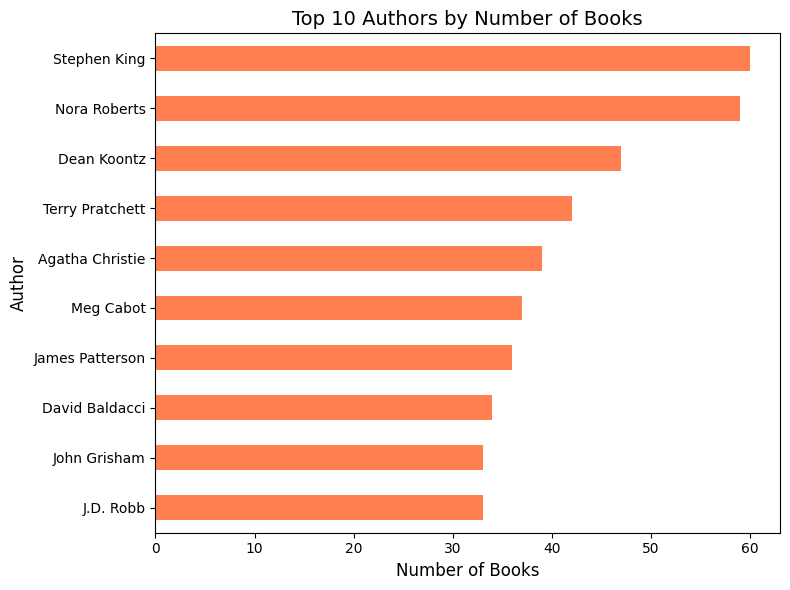

In [15]:
import matplotlib.pyplot as plt

# Get the top 10 authors with the most books, in descending order
top_authors = books_df['authors'].value_counts().head(10).sort_values(ascending=True)

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Plot horizontal bar chart
top_authors.plot(kind='barh', color='coral')

# Add chart title and axis labels
plt.title("Top 10 Authors by Number of Books", fontsize=14)
plt.xlabel("Number of Books", fontsize=12)
plt.ylabel("Author", fontsize=12)

# Layout adjustment
plt.tight_layout()

# Show plot
plt.show()

**b. Books with the Highest Ratings**
- Use the joined dataset to find the books with the highest average rating.

In [16]:
book_ratings = ratings_df.groupby('book_id')['rating'].mean()
book_ratings_df = book_ratings.reset_index().merge(books_df, on='book_id')
top_rated_books = book_ratings_df.sort_values(by='rating', ascending=False).head(10)
top_rated_books[['book_id', 'title', 'rating']]


,book_id,title,rating
769,9566,Still Life with Woodpecker,4.777778
354,4708,The Beautiful and Damned,4.660000
771,9569,Villa Incognito,4.618557
762,9531,Peter and the Shadow Thieves (Peter and the St...,4.557143
291,3885,The Taste of Home Cookbook,4.550000
206,2767,A People's History of the United States,4.540000
448,5344,Hard Times,4.535354
210,2865,Girl with a Pearl Earring,4.530000
786,9712,Love in the Time of Cholera,4.500000
95,976,Deception Point,4.500000


**c. Publication Year Analysis**
- Analyze the trend of book publications over time.

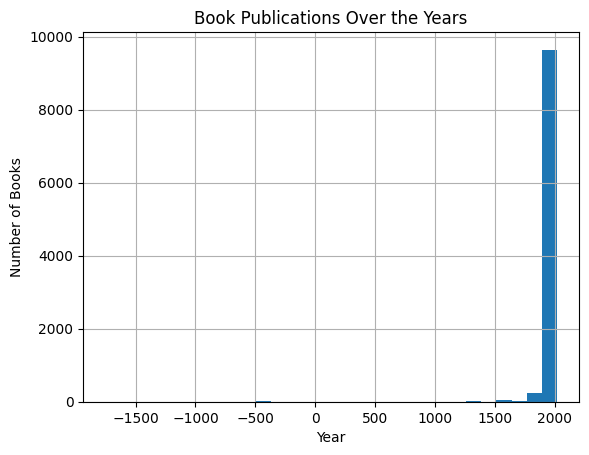

In [17]:
books_df['original_publication_year'].dropna().astype(int).hist(bins=30)
plt.title("Book Publications Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()


**d. Book Title and Author Uniqueness**
- Check for duplicate titles or authors to assess data quality.

In [18]:
duplicate_titles = books_df['title'].duplicated().sum()
duplicate_authors = books_df['authors'].duplicated().sum()

print(f"Duplicate Titles: {duplicate_titles}")
print(f"Duplicate Authors: {duplicate_authors}")


Duplicate Titles: 36
Duplicate Authors: 5336


**a. Top Rated Books with Minimum Number of Ratings**
- Find the top books that have a high average rating and at least 50 ratings (to avoid skewed high ratings from very few users).

In [19]:
# Merge ratings and books dataframes on 'book_id'
merged = ratings_df.merge(books_df, on='book_id')

# Compute average rating and number of ratings per book title
book_stats = merged.groupby('title').agg({'rating': ['mean', 'count']})
book_stats.columns = ['average_rating', 'num_ratings']

# Filter books with at least 50 ratings and sort by average rating
top_books = book_stats[book_stats['num_ratings'] >= 50].sort_values(by='average_rating', ascending=False).head(10)

# Enable interactive table display in Google Colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Display the resulting top_books
top_books


,average_rating,num_ratings
title,,
Still Life with Woodpecker,4.777778,99
The Beautiful and Damned,4.660000,100
Villa Incognito,4.618557,97
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143,70
The Taste of Home Cookbook,4.550000,100
A People's History of the United States,4.540000,100
Hard Times,4.535354,99
Girl with a Pearl Earring,4.530000,100
Love in the Time of Cholera,4.500000,94


**b. Correlation Between Average Rating and Number of Ratings**
- Use scatter plots to visualize any correlation between average ratings and number of ratings.

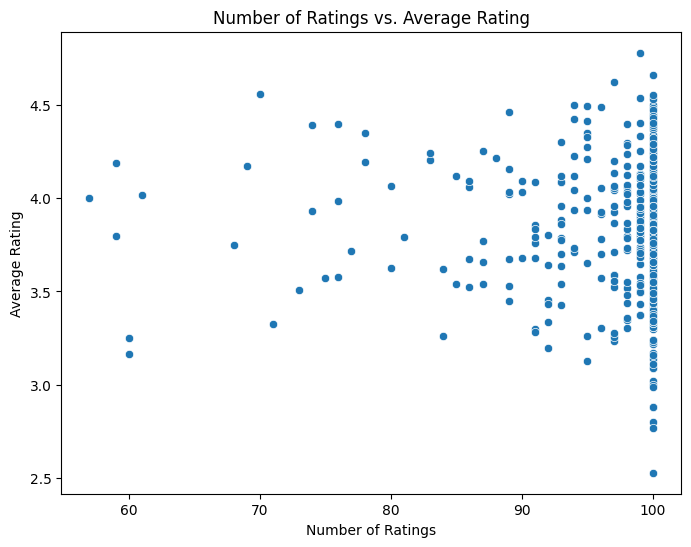

In [20]:
# Set the size of the figure
plt.figure(figsize=(8, 6))

sns.scatterplot(data=book_stats, x='num_ratings', y='average_rating')
plt.title("Number of Ratings vs. Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


## Data Preparation
- Prepare a smaller subset of the user-item matrix for collaborative filtering.

In [21]:
import pandas as pd

# Subset ratings data (e.g., first 10,000 entries)
ratings_subset = ratings_df.head(10000)

# Create user-item matrix
user_item_matrix = ratings_subset.pivot_table(index='user_id', columns='book_id', values='rating')

# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Preview matrix
user_item_matrix_filled.head()


book_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,5.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
439,3.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,4.0


## Collaborative Filtering
- Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_filled)

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity,
                                   index=user_item_matrix_filled.index,
                                   columns=user_item_matrix_filled.index)

# Function to recommend books for a given user with titles and authors
def recommend_books(user_id, user_item_matrix, similarity_matrix, books_df, n_recommendations=5):
    # Get similar users
    similar_users = similarity_matrix.loc[user_id].sort_values(ascending=False)[1:]

    # Get books rated by similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Compute weighted ratings
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    if similar_users.sum() == 0:
        return pd.DataFrame(columns=['book_id', 'title', 'authors', 'score'])  # Return empty DataFrame

    weighted_ratings = weighted_ratings / similar_users.sum()

    # Remove books already rated by the user
    user_rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = weighted_ratings.drop(user_rated_books, errors='ignore').sort_values(ascending=False).head(n_recommendations)

    # Create DataFrame from recommendations
    recs_df = pd.DataFrame({
        'book_id': recommendations.index,
        'score': recommendations.values
    })

    # Merge with books_df using 'id' in books_df
    recs_df = recs_df.merge(books_df[['id', 'title', 'authors']], left_on='book_id', right_on='id', how='left')
    recs_df = recs_df.drop(columns='id')  # Drop duplicate column

    return recs_df[['book_id', 'title', 'authors', 'score']]


In [23]:
# Example usage
recommendations = recommend_books(314, user_item_matrix_filled, user_similarity_df, books_df)
from IPython.display import display
display(recommendations)


,book_id,title,authors,score
0,11,The Kite Runner,Khaled Hosseini,1.025717
1,4,To Kill a Mockingbird,Harper Lee,0.973161
2,16,"The Girl with the Dragon Tattoo (Millennium, #1)","Stieg Larsson, Reg Keeland",0.971534
3,27,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",0.969390
4,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.968291


## Evaluation
- Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# 1. Split the ratings data
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Remove duplicates before pivoting
train_data = train_data.drop_duplicates(subset=['user_id', 'book_id'], keep='first')
test_data = test_data.drop_duplicates(subset=['user_id', 'book_id'], keep='first')

# 2. Create user-item matrices
train_matrix = train_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)
test_matrix = test_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)

# 3. Compute cosine similarity on training data
train_similarity = cosine_similarity(train_matrix)
train_similarity_df = pd.DataFrame(train_similarity, index=train_matrix.index, columns=train_matrix.index)

# 4. Predict ratings using user-user collaborative filtering
def predict_ratings(user_matrix, similarity_matrix):
    weighted_sum = np.dot(similarity_matrix, user_matrix)
    sim_sum = np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return np.where(sim_sum != 0, weighted_sum / sim_sum, 0)

predicted_ratings = predict_ratings(train_matrix.values, train_similarity)

# 5. Align test matrix with prediction dimensions
common_users = test_matrix.index.intersection(train_matrix.index)
common_books = test_matrix.columns.intersection(train_matrix.columns)

# Get indices for slicing
user_idx = [train_matrix.index.get_loc(u) for u in common_users]
book_idx = [train_matrix.columns.get_loc(b) for b in common_books]

# Extract matching predicted and actual ratings
actual = test_matrix.loc[common_users, common_books].values
predicted = predicted_ratings[np.ix_(user_idx, book_idx)]

# 6. Compute Mean Squared Error
mse = mean_squared_error(actual, predicted)
print("📊 Mean Squared Error (MSE):", mse)


## Visualizations and Insights
- Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

In [1]:
import matplot.pyplot as plt

# Create a heatmap to visualize user similarities
# Heatmap of user similarities
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:30, :30], cmap='viridis')
plt.title('User Similarity Heatmap (First 30 Users)')
plt.show()

# Analyze the most recommended books
# Analyze most recommended books (example for user_id 314)
recommended_book_ids = recommend_books(314, user_item_matrix_filled, user_similarity_df).index

# Map book IDs to titles
recommended_books = books[books['id'].isin(recommended_book_ids)][['id', 'title']]

print("Top Recommended Books for User 314:")
print(recommended_books)


NameError: name 'plt' is not defined